## Overview

As the demand for original video content continues to grow, our company is preparing to enter the film industry by launching a new movie studio but the company currently lacks industry experience and clear insight into what drives film success at the box office.This project analyzes various film industry datasets to uncover trends that can guide a company's strategic entry into the entertainment industry
to provide practical, data-driven insights that can guide the company's decisions. The findings will help the stakeholders identify which types of films to prioritize, understand audience preferences, and allocate resources more effectively to improve the chances of box office success and long-term sustainability.

## Business Understanding
### Project Objectives

### Main Objective
The main objective of this project is to analyze box office performance data in order to understand which types of films are most financially successful and use these insights to support strategic decision-making for a new movie studio.

### Specific Objectives
This project aims to:
- Look at how box office revenue varies across different movie genres.
- Understand the relationship between movie ratings and box office performance.
- Identify key features of successful films, including genre, release timing, and runtime.
- Observe how movie performance has changed over time to gain insight into audience preferences.


### Success Measurement
This project will be considered successful if the analysis produces clear insights that are easy to communicate, supported by effective visualizations, and results in practical recommendations that can be used by business stakeholders.


## DATA UNDERSTANDING
To provide a strategy for the new studio, we are using information from two primary sources that shows film success: popularity and financial performance.

#### Data sources
1. Box Office Mojo (bom.movie_gross.csv.gz): This dataset serves as the financial benchmark. It contains domestic and foreign gross earnings, allowing us to identify which films achieved the highest commercial reach.

2. IMDB Relational Database (im.db): We are utilizing two key tables from this SQLite database:

- movie_basics: Provides essential metadata including primary titles, original title, runtime minutes, release years, and genre classifications.

- movie_ratings: Contains user-generated data, specifically average ratings and "numvotes," which act as a proxy for audience engagement and long-term relevance.

#### Integration Strategy
By joining these datasets on movie titles and years, we can correlate specific genres with their return on investment. This allows us to move beyond simply seeing what people watched, to understanding what they actually enjoyed and which genres consistently command the highest ticket sales.


# Data Preparation

### Importing libraries

In [2]:
#import libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.listdir()

['.git',
 '.gitignore',
 'index.ipynb',
 'README.md',
 'requirements.txt',
 'zippedData']

In [4]:
#Reading bom.movies,csv file
df_gross=pd.read_csv('zippedData/bom.movie_gross.csv.gz',compression='gzip')
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
# Read the 'tmdb.movies.csv' file from the original location
df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip')
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
# Read the 'tn.movies_budgets csv' file from the original location
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
# Read the 'rt.movie_info.tsv' file, specifying the tab separator
df_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', compression='gzip')
df_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [8]:
#Read the 'rt.reviews.tsv' file
df_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t',compression='gzip',encoding='latin1')

df_reviews.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [56]:
#Read the 'tn.movie_budgets.csv' file
df_budgets=pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
df_budgets.head()                          

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
#Extracting im.db.zip file
import zipfile

zip_path = 'zippedData/im.db.zip'
extract_to = 'zippedData'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete")


Extraction complete


In [10]:
#Connecting to im.db database and reading table names

conn = sqlite3.connect('zippedData/im.db')

tables = pd.read_sql(
    "SELECT name FROM sqlite_master WHERE type='table';",
    conn
)

tables


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [11]:
#Reading sqlite_master table to see database structure
query = 'SELECT * FROM sqlite_master;'
df_sqlite = pd.read_sql(query, conn)
df_sqlite.head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


### movie basics

In [12]:
# Reading movie_basics table
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [14]:
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [15]:
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [16]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
# Reading movie_ratings table
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [18]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [20]:
movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [21]:
#JOINING TWO TABLES movie_basics AND movie_ratings
movies = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING (movie_id);
""",conn)
movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


### BOM movie gross data info

In [22]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [23]:
df_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [24]:
df_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

## Distribution Analysis

This section examines how box office revenue is distributed across domestic and international markets. Boxplots are used to identify typical performance as well as outliers, which represent exceptionally high-grossing films.

In [25]:
# Select relevant columns
dist_data = df_gross[['domestic_gross', 'foreign_gross']].copy()

# Convert to numeric (fixes TypeError)
dist_data['domestic_gross'] = pd.to_numeric(dist_data['domestic_gross'], errors='coerce')
dist_data['foreign_gross'] = pd.to_numeric(dist_data['foreign_gross'], errors='coerce')

# Drop missing values
dist_data = dist_data.dropna()

# Remove zero or negative values
dist_data = dist_data[
    (dist_data['domestic_gross'] > 0) &
    (dist_data['foreign_gross'] > 0)
]

dist_data.describe()


,domestic_gross,foreign_gross
count,2.004000e+03,2.004000e+03
mean,4.566975e+07,7.590713e+07
std,7.637549e+07,1.382501e+08
min,4.000000e+02,6.000000e+02
25%,6.617500e+05,3.900000e+06
50%,1.635000e+07,1.955000e+07
75%,5.570000e+07,7.615000e+07
max,7.001000e+08,9.605000e+08


### Box Office Revenue Distribution

The boxplots below compare the distribution of domestic and foreign box office revenues.  
Both distributions are highly right-skewed, with many extreme outliers representing
exceptionally high-grossing films.


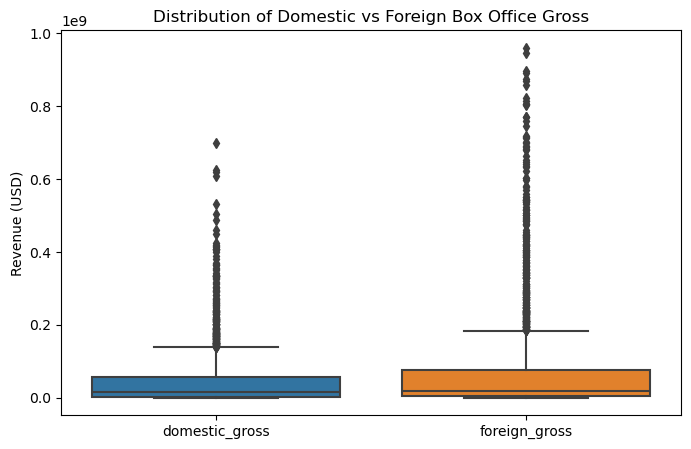

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dist_data)
plt.title("Distribution of Domestic vs Foreign Box Office Gross")
plt.ylabel("Revenue (USD)")
plt.show()


### Log-Scaled Distribution

Due to the strong skew in box office revenues, a log10 transformation was applied.
The log-scaled boxplots reveal clearer differences in central tendency and spread,
making it easier to compare typical domestic and foreign performance.


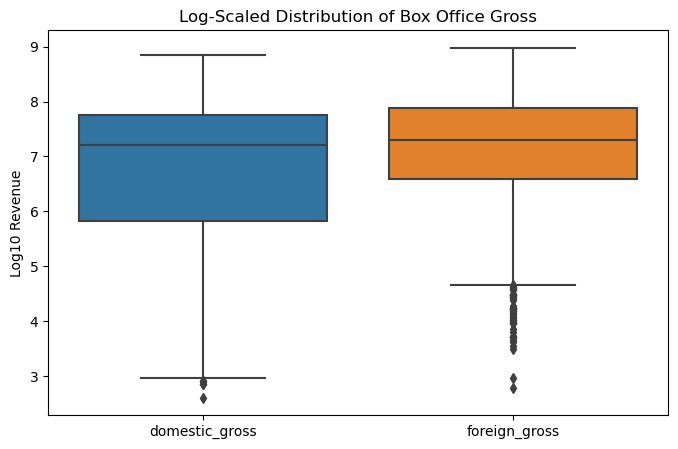

In [27]:
log_dist_data = dist_data.apply(np.log10)

plt.figure(figsize=(8, 5))
sns.boxplot(data=log_dist_data)
plt.title("Log-Scaled Distribution of Box Office Gross")
plt.ylabel("Log10 Revenue")
plt.show()


### Merging the bom and movies datasets

In [28]:
merged_df =df_gross.merge(movies,
                          left_on="title",
                          right_on="primary_title",
                          how="inner")
merged_df

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823
3023,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance",5.9,9
3024,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",7.0,1016
3025,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270


In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   movie_id         3027 non-null   object 
 6   primary_title    3027 non-null   object 
 7   original_title   3027 non-null   object 
 8   start_year       3027 non-null   int64  
 9   runtime_minutes  2980 non-null   float64
 10  genres           3020 non-null   object 
 11  averagerating    3027 non-null   float64
 12  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 307.6+ KB


In [30]:
merged_df.describe()

,domestic_gross,year,start_year,runtime_minutes,averagerating,numvotes
count,3.005000e+03,3027.000000,3027.000000,2980.000000,3027.000000,3.027000e+03
mean,3.064033e+07,2014.077635,2013.783284,107.217114,6.457582,6.170030e+04
std,6.671629e+07,2.442245,2.466955,20.073886,1.012277,1.255132e+05
min,1.000000e+02,2010.000000,2010.000000,3.000000,1.600000,5.000000e+00
25%,1.390000e+05,2012.000000,2012.000000,94.000000,5.900000,2.117000e+03
50%,2.000000e+06,2014.000000,2014.000000,105.000000,6.600000,1.310900e+04
75%,3.250000e+07,2016.000000,2016.000000,118.000000,7.100000,6.276550e+04
max,7.001000e+08,2018.000000,2019.000000,272.000000,9.200000,1.841066e+06


In [31]:
merged_df.isnull().sum()

title                 0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
dtype: int64

#### Data Cleaning

In [32]:
merged_df['foreign_gross'].unique()

array(['652000000', '535700000', '513900000', ..., '229000', '256000',
       '30000'], dtype=object)

Foreign_gross column

In [33]:
#converting the foreign_gross column from strings to floats
merged_df['foreign_gross'] = pd.to_numeric(merged_df['foreign_gross'], errors='coerce')
#fill the missing values with the mean
merged_df['foreign_gross']= merged_df['foreign_gross'].fillna(merged_df['foreign_gross'].median())

Cleaning domestic gross column

In [34]:
merged_df['domestic_gross'].unique()

array([4.150e+08, 2.926e+08, 2.387e+08, ..., 2.620e+04, 1.840e+04,
       1.780e+04])

In [35]:
#fill the missing values with the mean
merged_df['domestic_gross']= merged_df['domestic_gross'].fillna(merged_df['domestic_gross'].mean())

In [36]:
# fill missing values with the mean
merged_df['runtime_minutes']= merged_df['runtime_minutes'].fillna(merged_df['runtime_minutes'].mean())

In [37]:
# drop rows with missing genre
merged_df= merged_df.dropna(subset=['genres'])

In [59]:
merged_df.head() #the first five rows

,title,studio,domestic_gross,foreign_gross,year,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [39]:
print(merged_df.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')


In [52]:
#dropping duplicate columns
merged_df=merged_df.drop(['primary_title','original_title'], axis=1, errors='ignore') 

print(merged_df.columns)


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'movie_id', 'start_year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes'],
      dtype='object')


In [62]:
#converting the genres column from strings to lists and then exploding the lists into separate rows
merged_df['genres'] = merged_df['genres'].str.split(',')
merged_df = merged_df.explode('genres')
merged_df['genres']

0       Adventure
0       Animation
0          Comedy
1          Action
1       Adventure
          ...    
3024     Thriller
3025       Action
3025        Drama
3025     Thriller
3026       Comedy
Name: genres, Length: 6978, dtype: object

### Correlation Heatmap for numerical columns

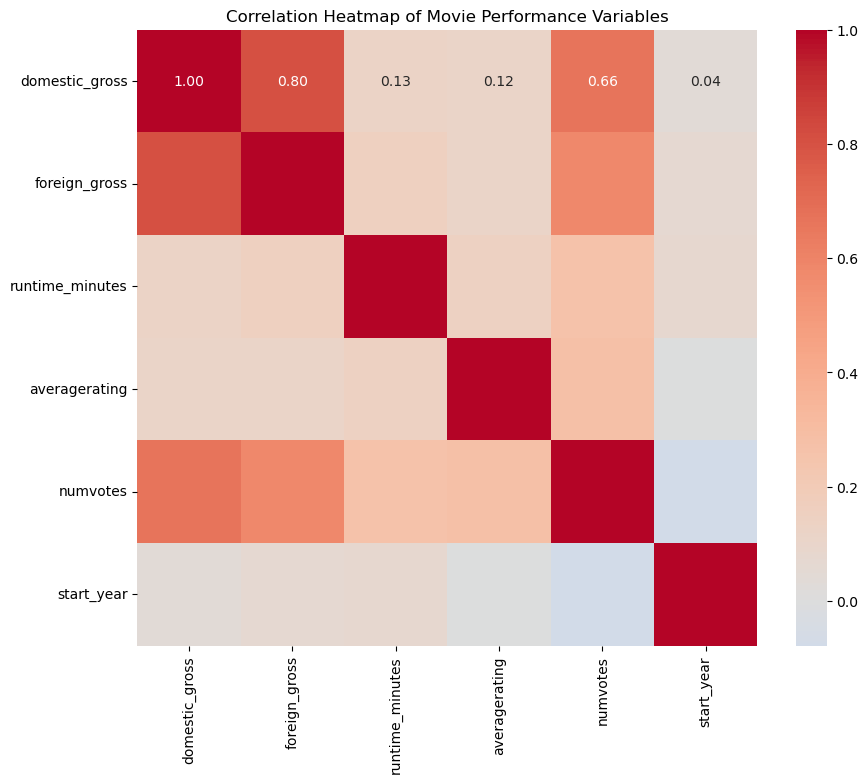

In [40]:

# Select only numeric columns
numeric_columns = merged_df[[
    'domestic_gross',
    'foreign_gross',
    'runtime_minutes',
    'averagerating',
    'numvotes',
    'start_year'
]]

# Compute correlation matrix
corr = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Heatmap of Movie Performance Variables")
plt.show()
